# **Mini Project on List of Political Parties Participated During-2024**


## **DataSet:** PoliticalParties.csv  
## **Source:** [https://www.data.gov.in/resource/list-political-parties-participated-during-2024](https://www.data.gov.in/resource/list-political-parties-participated-during-2024)



# Political Parties Participated in 2024
<p style="font-size:16pt;">  
The dataset contains details of the political parties that contested in the 2024 elections, capturing key information such as party type, abbreviation, party symbol, and party name. These attributes help in analyzing how parties are positioned, identified, and distributed across the national and regional landscape. The dataset is clean, with consistent attributes, making it suitable for political analytics.
</p>  

# Political Parties Analytics Parameters  

## 1. Party Count by Type  
<p style="font-size:16pt;">  
This parameter calculates how many parties are classified as <b>National</b>, <b>State</b>, or <b>Regional</b>.  
It helps in understanding the overall political balance. A high count of regional parties indicates more localized competition, while a strong national presence shows centralized influence.  
</p>  

## 2. Unique Symbols  
<p style="font-size:16pt;">  
Each party is assigned a symbol by the Election Commission for identification. Checking for unique symbols ensures that no two parties share the same symbol, which could otherwise confuse voters.  
Analyzing symbols also shows trends — for example, whether more parties prefer cultural symbols, natural elements, or ideological icons.  
</p>  

## 3. Unique Abbreviations  
<p style="font-size:16pt;">  
Abbreviations like <b>INC</b>, <b>BJP</b>, <b>AAP</b>, <b>BSP</b> are short identifiers that appear on ballots and in media.  
Analyzing uniqueness avoids duplication, ensuring each party is clearly distinguishable. Duplicate or similar abbreviations could reduce clarity and impact recognition.  
</p>  

## 4. Party Name Length  
<p style="font-size:16pt;">  
This measures the minimum, maximum, and average length of party names. Short names are often catchy and memorable, while longer names tend to reflect ideology, history, or regional identity.  
By analyzing name lengths, we can understand branding strategies used by parties.  
</p>  

## 5. First Letter of Party Name  
<p style="font-size:16pt;">  
Grouping by the first letter helps identify common initials. For example, many parties start with  
“I” (<b>Indian</b>), “B” (<b>Bharatiya</b>), or “C” (<b>Congress/Communist</b>).  
This shows linguistic and ideological patterns in naming conventions.  
</p>  

## 6. Symbol Category  
<p style="font-size:16pt;">  
Symbols can be classified into categories such as:  
</p>  

<p style="font-size:16pt;">  
- <b>Animals</b> (Elephant, Lion, Tiger → strength and power)  
- <b>Objects</b> (Hand, Lotus, Broom → cultural or everyday items)  
- <b>Tools/Ideology</b> (Hammer, Sickle, Star → movements and struggles).  
Categorization helps in understanding how parties connect with voter psychology through visual representation.
</p>  

## 7. Top Abbreviations  
<p style="font-size:16pt;">  
Some abbreviations are more common than others. Analyzing the most frequent abbreviations helps in detecting naming patterns.  
For example, multiple parties may use “A” for <b>All India</b> or “J” for <b>Janata</b>.  
This can reveal recurring political identities.  
</p>  


In [ ]:
# PySpark & visualization imports
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, length, upper, first, substring
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, length, min, max
from pyspark.sql import functions as F


In [2]:
# 1. Start Spark session
spark = SparkSession.builder.appName("Politicalparties2024").getOrCreate()

In [3]:
# 2. Load CSV
df = spark.read.csv("PoliticalParties.csv", header=True, inferSchema=True)

In [4]:
# 3. Basic info
df.printSchema()
df.show(5, truncate=False)

root
 |-- Sr. No.: integer (nullable = true)
 |-- Party Type: string (nullable = true)
 |-- Abbreviation: string (nullable = true)
 |-- Party Symbol: string (nullable = true)
 |-- Party Name: string (nullable = true)

+-------+----------+------------+-----------------------+----------------------------------+
|Sr. No.|Party Type|Abbreviation|Party Symbol           |Party Name                        |
+-------+----------+------------+-----------------------+----------------------------------+
|1      |N         |AAAP        |Broom                  |Aam Aadmi Party                   |
|2      |N         |BJP         |Lotus                  |Bharatiya Janata Party            |
|3      |N         |BSP         |Elephant               |Bahujan Samaj Party               |
|4      |N         |CPI(M)      |Hammer, Sickle and Star|Communist Party of India (Marxist)|
|5      |N         |INC         |Hand                   |Indian National Congress          |
+-------+----------+------------+-----

In [5]:
# ------------------------------
# A. Basic Counts
# ------------------------------

print("✅ Total Parties:", df.count())
print("✅ Unique Abbreviations:", df.select("Abbreviation").distinct().count())
print("✅ Unique Symbols:", df.select("Party Symbol").distinct().count())

✅ Total Parties: 745
✅ Unique Abbreviations: 745
✅ Unique Symbols: 327


In [6]:
# ------------------------------
# B. Count parties by type
# ------------------------------
party_type_count = df.groupBy("Party Type").agg(count("*").alias("Count"))
party_type_count.show()

+----------+-----+
|Party Type|Count|
+----------+-----+
|         U|  690|
|        Z1|    1|
|         Z|    1|
|         N|    6|
|         S|   47|
+----------+-----+



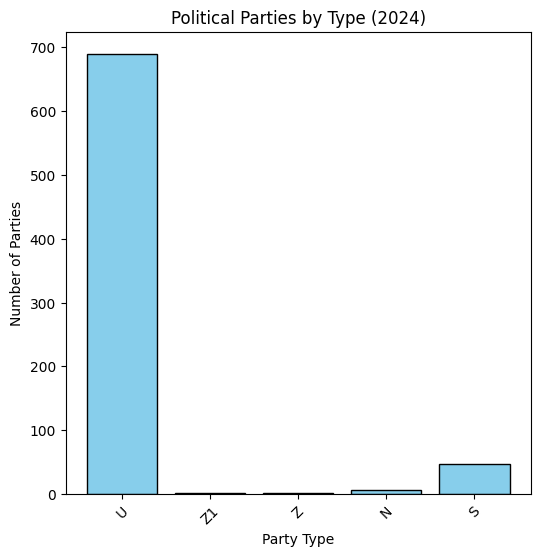

In [7]:
# Convert to Pandas for matplotlib
party_type_pd = party_type_count.toPandas()
plt.figure(figsize=(6,6))
plt.bar(party_type_pd["Party Type"], party_type_pd["Count"], color="skyblue", edgecolor="black")
plt.title("Political Parties by Type (2024)")
plt.xlabel("Party Type")
plt.ylabel("Number of Parties")
plt.xticks(rotation=45)
plt.show()

In [9]:
# ------------------------------
# C. Name Length Analysis
# ------------------------------
df_len = df.withColumn("NameLength", length(col("Party Name")))
name_length_stats = df_len.selectExpr("avg(NameLength) as AvgLength", 
                                      "max(NameLength) as MaxLength", 
                                      "min(NameLength) as MinLength")
name_length_stats.show()

+------------------+---------+---------+
|         AvgLength|MaxLength|MinLength|
+------------------+---------+---------+
|24.163758389261744|       56|        9|
+------------------+---------+---------+



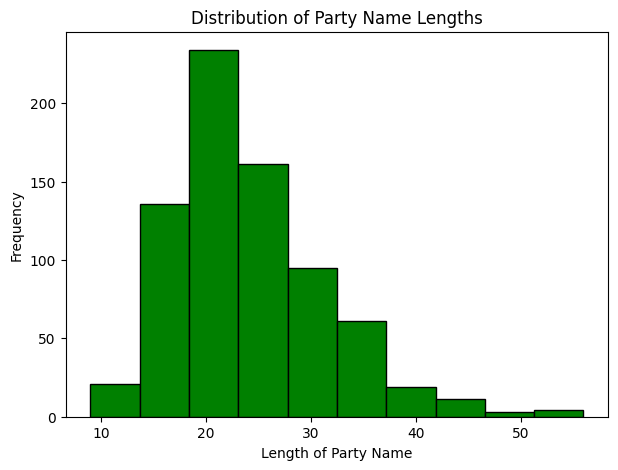

In [10]:
# Histogram of party name lengths
len_pd = df_len.select("NameLength").toPandas()
plt.figure(figsize=(7,5))
plt.hist(len_pd["NameLength"], bins=10, color="green", edgecolor="black")
plt.title("Distribution of Party Name Lengths")
plt.xlabel("Length of Party Name")
plt.ylabel("Frequency")
plt.show()

In [11]:
# ------------------------------
# D. First Letter Grouping
# ------------------------------
df_letter = df.withColumn("FirstLetter", substring(col("Party Name"), 1, 1))
letter_count = df_letter.groupBy("FirstLetter").agg(count("*").alias("Count")).orderBy(col("Count").desc())
letter_count.show(10, truncate=False)

+-----------+-----+
|FirstLetter|Count|
+-----------+-----+
|A          |113  |
|B          |108  |
|R          |87   |
|S          |82   |
|J          |58   |
|N          |41   |
|P          |39   |
|M          |33   |
|T          |23   |
|K          |23   |
+-----------+-----+
only showing top 10 rows


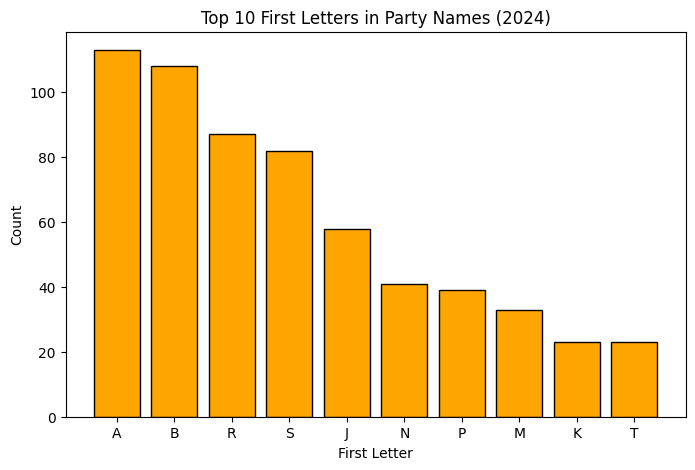

In [12]:
# Plot top 10 first letters
letter_pd = letter_count.limit(10).toPandas()
plt.figure(figsize=(8,5))
plt.bar(letter_pd["FirstLetter"], letter_pd["Count"], color="orange", edgecolor="black")
plt.title("Top 10 First Letters in Party Names (2024)")
plt.xlabel("First Letter")
plt.ylabel("Count")
plt.show()

+--------------+-----+
|Party Symbol  |Count|
+--------------+-----+
|Auto- rickshaw|35   |
|Ganna kisan   |25   |
|Gas cylinder  |24   |
|Whistle       |19   |
|Diamond       |17   |
|Apple         |17   |
|Battery Torch |17   |
|Bat           |16   |
|Scissors      |14   |
|Coconut farm  |12   |
+--------------+-----+
only showing top 10 rows


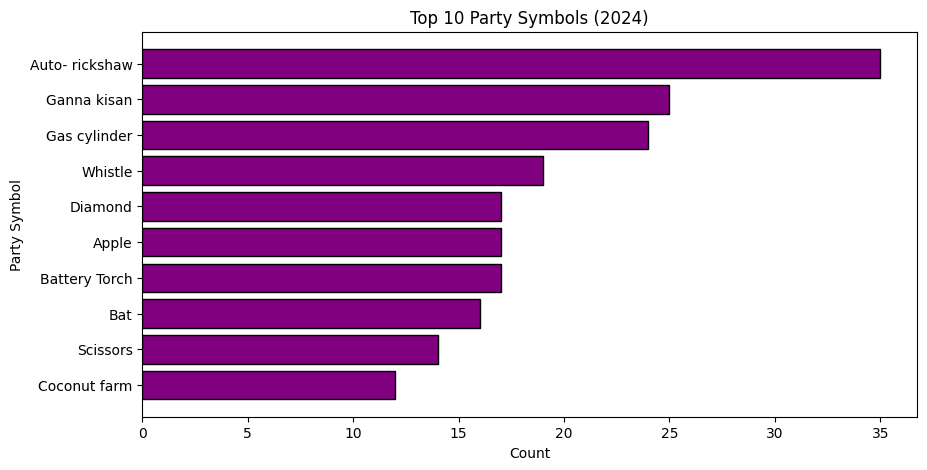

In [13]:
# ------------------------------
# E. Most Common Symbols
# ------------------------------
symbol_count_df = df.groupBy("Party Symbol").agg(count("*").alias("Count")).orderBy(col("Count").desc())
symbol_count_df.show(10, truncate=False)

symbol_pd = symbol_count_df.limit(10).toPandas()
plt.figure(figsize=(10,5))
plt.barh(symbol_pd["Party Symbol"], symbol_pd["Count"], color="purple", edgecolor="black")
plt.title("Top 10 Party Symbols (2024)")
plt.xlabel("Count")
plt.ylabel("Party Symbol")
plt.gca().invert_yaxis()
plt.show()

In [14]:
# ------------------------------
# F. Normalize Abbreviations (Consistency Check)
# ------------------------------
df_clean = df.withColumn("Abbreviation", upper(col("Abbreviation")))
print("✅ Cleaned Abbreviations (Uppercased):")
df_clean.select("Party Name", "Abbreviation").show(10, truncate=False)

✅ Cleaned Abbreviations (Uppercased):
+----------------------------------------+------------+
|Party Name                              |Abbreviation|
+----------------------------------------+------------+
|Aam Aadmi Party                         |AAAP        |
|Bharatiya Janata Party                  |BJP         |
|Bahujan Samaj Party                     |BSP         |
|Communist Party of India (Marxist)      |CPI(M)      |
|Indian National Congress                |INC         |
|National People's Party                 |NPEP        |
|Apna Dal (Soneylal)                     |ADAL        |
|All India Anna Dravida Munnetra Kazhagam|ADMK        |
|Asom Gana Parishad                      |AGP         |
|All India Forward Bloc                  |AIFB        |
+----------------------------------------+------------+
only showing top 10 rows


In [20]:
# ------------------------------
# I. Abbreviation Length (Min, Max)
# ------------------------------
df_abbr_len = df.withColumn("AbbrLength", length(col("Abbreviation")))
df_abbr_len.select(
    min("AbbrLength").alias("MinAbbrLength"),
    max("AbbrLength").alias("MaxAbbrLength")
).show()


+-------------+-------------+
|MinAbbrLength|MaxAbbrLength|
+-------------+-------------+
|            2|           10|
+-------------+-------------+



In [25]:
#J.Filter by Party Type (e.g., Major / National / State)
df_active = df.filter(~F.col("Party Type").isin(["Minor", "Defunct"]))
df_active.show()


+-------+----------+------------+--------------------+--------------------+
|Sr. No.|Party Type|Abbreviation|        Party Symbol|          Party Name|
+-------+----------+------------+--------------------+--------------------+
|      1|         N|        AAAP|               Broom|     Aam Aadmi Party|
|      2|         N|         BJP|               Lotus|Bharatiya Janata ...|
|      3|         N|         BSP|            Elephant| Bahujan Samaj Party|
|      4|         N|      CPI(M)|Hammer, Sickle an...|Communist Party o...|
|      5|         N|         INC|                Hand|Indian National C...|
|      6|         N|        NPEP|                Book|National People's...|
|      7|         S|        ADAL|        Cup & saucer| Apna Dal (Soneylal)|
|      8|         S|        ADMK|          Two leaves|All India Anna Dr...|
|      9|         S|         AGP|            Elephant|  Asom Gana Parishad|
|     10|         S|        AIFB|                Lion|All India Forward...|
|     11|   

In [27]:
#K.Find Parties with Specific Symbols / Keywords
df_animal_symbol = df.filter(F.col("Party Symbol").contains("Elephant"))
df_animal_symbol.show()

+-------+----------+------------+------------+-------------------+
|Sr. No.|Party Type|Abbreviation|Party Symbol|         Party Name|
+-------+----------+------------+------------+-------------------+
|      3|         N|         BSP|    Elephant|Bahujan Samaj Party|
|      9|         S|         AGP|    Elephant| Asom Gana Parishad|
+-------+----------+------------+------------+-------------------+



In [31]:
#L.Party name length between 10 and 25 characters
df_mid_names = df.filter((F.length(F.col("Party Name")) >= 10) & 
                         (F.length(F.col("Party Name")) <= 25))
df_mid_names.show()


+-------+----------+------------+--------------------+--------------------+
|Sr. No.|Party Type|Abbreviation|        Party Symbol|          Party Name|
+-------+----------+------------+--------------------+--------------------+
|      1|         N|        AAAP|               Broom|     Aam Aadmi Party|
|      2|         N|         BJP|               Lotus|Bharatiya Janata ...|
|      3|         N|         BSP|            Elephant| Bahujan Samaj Party|
|      5|         N|         INC|                Hand|Indian National C...|
|      6|         N|        NPEP|                Book|National People's...|
|      7|         S|        ADAL|        Cup & saucer| Apna Dal (Soneylal)|
|      9|         S|         AGP|            Elephant|  Asom Gana Parishad|
|     10|         S|        AIFB|                Lion|All India Forward...|
|     14|         S|       AJSUP|              Banana|          AJSU Party|
|     15|         S|        BHRS|                 Car|Bharat Rashtra Sa...|
|     16|   

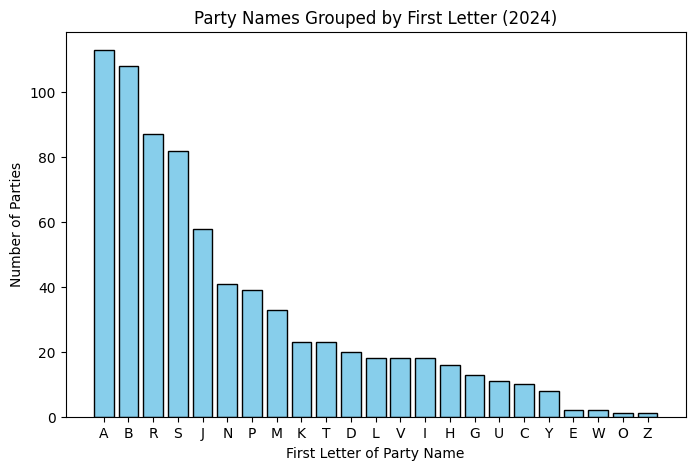

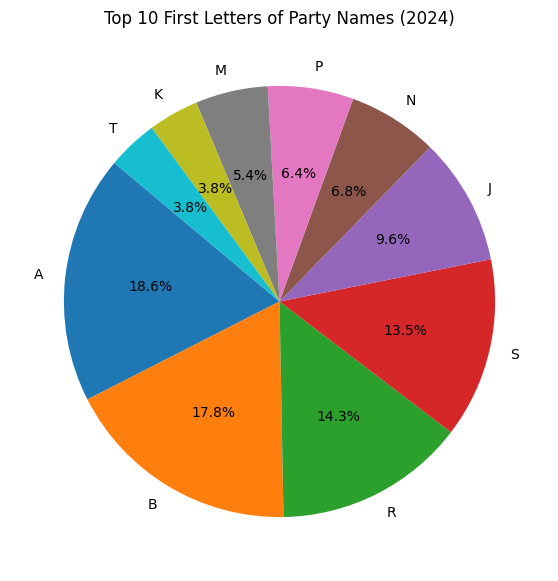

In [32]:
# M.Convert Spark DF to Pandas
letter_pd = letter_count.toPandas()

# -------------------------
# Bar Chart
# -------------------------
plt.figure(figsize=(8,5))
plt.bar(letter_pd["FirstLetter"], letter_pd["Count"], color="skyblue", edgecolor="black")
plt.title("Party Names Grouped by First Letter (2024)")
plt.xlabel("First Letter of Party Name")
plt.ylabel("Number of Parties")
plt.show()

# -------------------------
# Pie Chart (Top 10 Letters)
# -------------------------
top10_letters = letter_pd.head(10)

plt.figure(figsize=(7,7))
plt.pie(top10_letters["Count"], labels=top10_letters["FirstLetter"], autopct="%1.1f%%", startangle=140)
plt.title("Top 10 First Letters of Party Names (2024)")
plt.show()


+-------+----------+------------+---------------------+--------------------------------------------------------+----------+
|Sr. No.|Party Type|Abbreviation|Party Symbol         |Party Name                                              |NameLength|
+-------+----------+------------+---------------------+--------------------------------------------------------+----------+
|19     |S         |CPI(ML)(L)  |Flag with three stars|Communist Party of India (Marxist-Leninist) (Liberation)|56        |
|141    |U         |APTADMK     |Helmet,Jackfruit     |Anna Puratchi Thalaivar Amma Dravida Munnetra Kazhagam  |54        |
|617    |U         |SAD(M)      |Bucket               |Shiromani Akali Dal (Amritsar)(Simranjit Singh Mann)    |52        |
|734    |U         |VTVTK       |Pestle and mortar    |Veerath Thiyagi Viswanathadoss Thozhilalarkal Katchi    |52        |
|634    |U         |SBSPSP      |Almirah              |Subhashwadi Bhartiya Samajwadi Party (Subhas Party)     |51        |
|35     

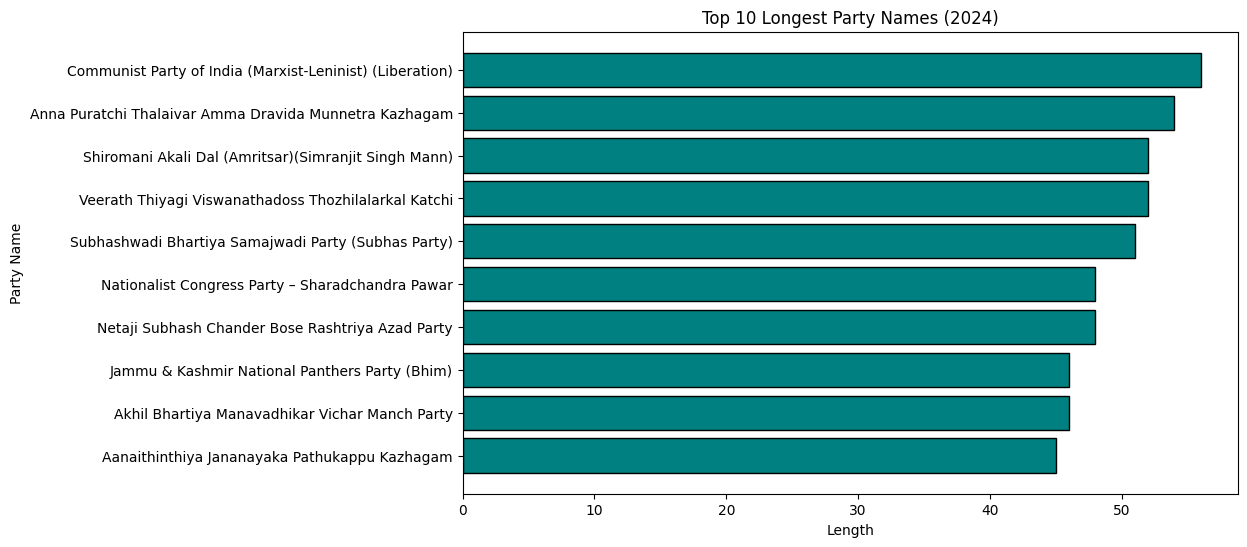

In [33]:
#N.LONEGST PARTY NAMES
df_len = df.withColumn("NameLength", F.length(F.col("Party Name")))
longest_names = df_len.orderBy(F.col("NameLength").desc()).limit(10)
longest_names.show(truncate=False)

# Plot
longest_pd = longest_names.toPandas()
plt.figure(figsize=(10,6))
plt.barh(longest_pd["Party Name"], longest_pd["NameLength"], color="teal", edgecolor="black")
plt.title("Top 10 Longest Party Names (2024)")
plt.xlabel("Length")
plt.ylabel("Party Name")
plt.gca().invert_yaxis()
plt.show()


+--------------+-----+
|SymbolCategory|Count|
+--------------+-----+
|        Animal|    3|
|        Object|    8|
|         Other|  732|
| Tool/Ideology|    2|
+--------------+-----+



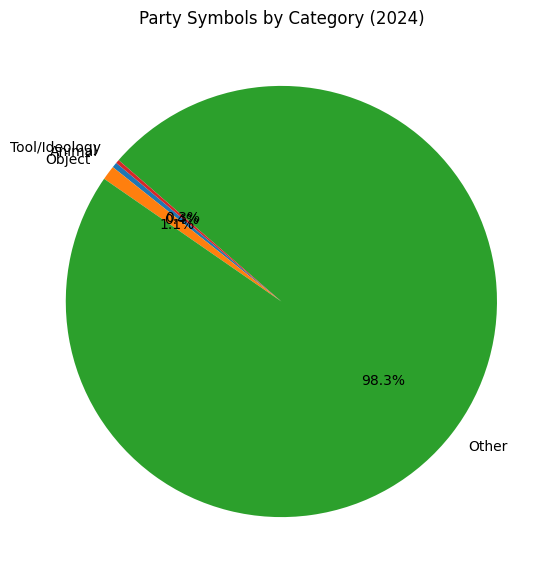

In [34]:
#O.Symbol Categories (Objects, Animals, Tools, etc.)
df_symbol_cat = df.withColumn(
    "SymbolCategory",
    F.when(F.col("Party Symbol").rlike("Elephant|Lion|Tiger|Horse"), "Animal")
     .when(F.col("Party Symbol").rlike("Hand|Lotus|Broom"), "Object")
     .when(F.col("Party Symbol").rlike("Star|Hammer|Sickle"), "Tool/Ideology")
     .otherwise("Other")
)

symbol_cat_count = df_symbol_cat.groupBy("SymbolCategory").agg(F.count("*").alias("Count"))
symbol_cat_count.show()

# Pie Chart
cat_pd = symbol_cat_count.toPandas()
plt.figure(figsize=(7,7))
plt.pie(cat_pd["Count"], labels=cat_pd["SymbolCategory"], autopct="%1.1f%%", startangle=140)
plt.title("Party Symbols by Category (2024)")
plt.show()


+---------+-----+
|Word     |Count|
+---------+-----+
|Party    |517  |
|Rashtriya|68   |
|India    |61   |
|Dal      |55   |
|Samaj    |54   |
|Bhartiya |49   |
|Bharat   |36   |
|Bharatiya|35   |
|National |31   |
|Jan      |31   |
+---------+-----+
only showing top 10 rows


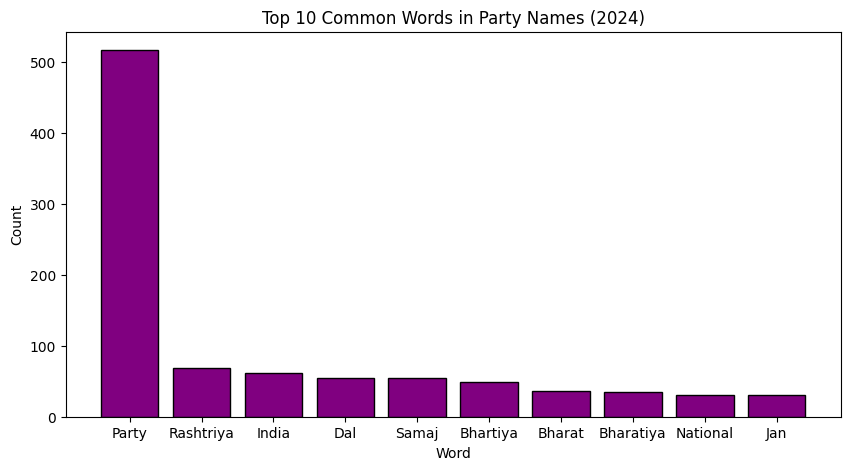

In [35]:
# P.Split words in party names
df_words = df.withColumn("Word", F.explode(F.split(F.col("Party Name"), " ")))
word_count = df_words.groupBy("Word").agg(F.count("*").alias("Count")).orderBy(F.col("Count").desc())
word_count.show(10, truncate=False)

# Bar Chart
word_pd = word_count.limit(10).toPandas()
plt.figure(figsize=(10,5))
plt.bar(word_pd["Word"], word_pd["Count"], color="purple", edgecolor="black")
plt.title("Top 10 Common Words in Party Names (2024)")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()


# Conclusion
<p style="font-size:16pt;">  
The 2024 dataset of political parties provides a comprehensive overview of the parties that participated in the elections, offering key insights into the nature and structure of India’s multiparty democracy. It highlights the classification of parties into national, state, and regional categories, showing how political competition is spread across both centralized governance and localized representation. National parties symbolize stability and broader national influence, while regional and state parties reflect the diversity of India’s electorate by voicing local concerns and ensuring grassroots participation. This balance reveals the vibrancy of Indian democracy, where both large and small political entities play a vital role in shaping governance.  
</p>  

<p style="font-size:16pt;">  
Another important dimension of the dataset lies in the use of symbols and abbreviations. Symbols such as the lotus, broom, hand, and elephant are more than just identifiers; they carry cultural, social, and ideological meanings that connect with voters on an emotional level. In a country where literacy levels vary, visual symbols become powerful tools of recognition, ensuring every voter can make an informed choice. Abbreviations like INC, BJP, and AAP further enhance clarity and consistency in ballots, media, and campaigns, preventing confusion while strengthening party branding. The uniqueness of these identifiers emphasizes how parties distinguish themselves in a competitive electoral environment.  
</p>  

<p style="font-size:16pt;">  
The dataset also reflects deeper linguistic and ideological patterns in party names and symbol categories. Many parties use familiar prefixes such as “Indian,” “Bharatiya,” or “Janata,” reflecting historical traditions and collective identity, while the length of names varies between short, catchy identifiers and longer names rooted in ideology or regional pride. Categorization of symbols into animals, objects, and ideological tools shows the diverse strategies parties employ to appeal to voters’ psychology, often blending strength, tradition, and struggle into their identities. Taken together, the dataset is not just a record of parties but a mirror of India’s evolving political culture, offering researchers, policymakers, and citizens valuable insights into how electoral competition is shaped in 2024.  
</p>  
